In [1]:
#!pip install yfinance
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
import tensorflow as tf
from keras.models import Sequential
import yfinance as yf

# Set random seeds for reproducibility
seed = 2016
np.random.seed(seed)
tf.random.set_seed(seed)

# Splitting into train and test sets
from sklearn.model_selection import train_test_split

# Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt

# Splitting into train and test sets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from pmdarima import auto_arima
import pmdarima as pm

In [2]:


def download_litecoin_data():
    # Define the ticker symbol for Litecoin (LTC)
    ticker_symbol = 'LTC-USD'

    # Define the start and end dates for the historical data (5 years ago from the current date)
    end_date = pd.Timestamp.now()
    start_date = end_date - pd.DateOffset(years=5)

    # Download historical data from Yahoo Finance
    data = yf.download(ticker_symbol, start=start_date, end=end_date)

    # Save the data to a CSV file
    data.to_csv('litecoin_data.csv')

if __name__ == "__main__":
    download_litecoin_data()


[*********************100%***********************]  1 of 1 completed


In [3]:
df = pd.read_csv('litecoin_data.csv')

<AxesSubplot:>

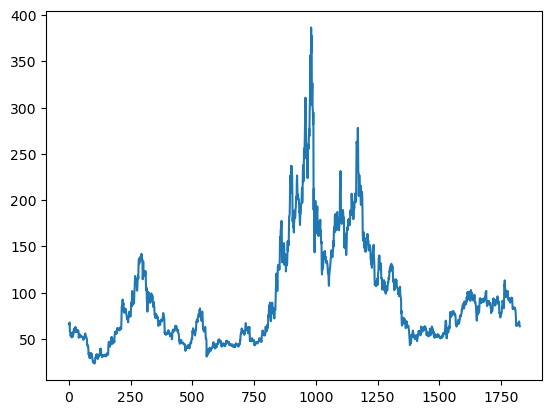

In [4]:
data = df['Adj Close']
data.plot()

In [5]:
# Assuming df is your DataFrame and 'Adj Close' is the column of interest
series = df['Adj Close']

# Perform ADF test
result = adfuller(series)

# Extract results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

ADF Statistic: -2.046735042579044
p-value: 0.2664645524208099
Critical Values:
   1%: -3.433966009459769
   5%: -2.8631372667825503
   10%: -2.567620331903232


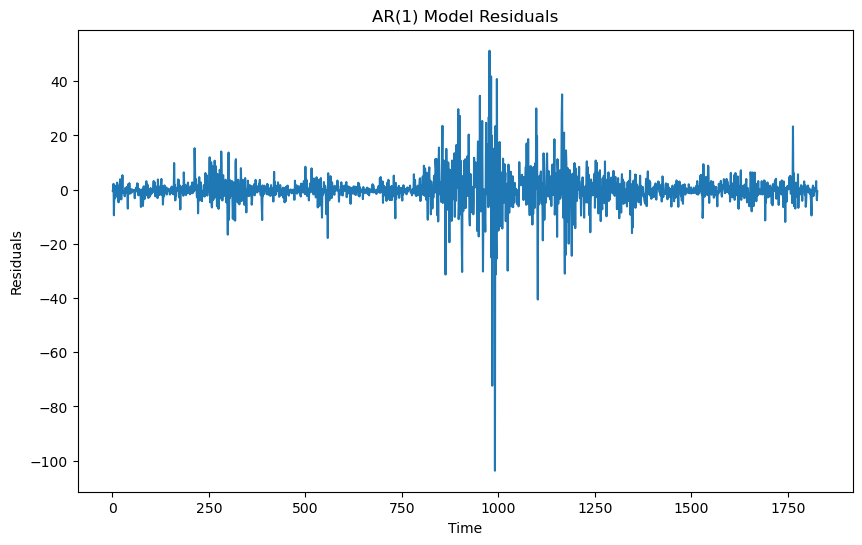

In [6]:
# Create lagged series for AR(1) model
lagged_series = series.shift(1).dropna()

# Fit AR(1) model
model = sm.OLS(series[1:], sm.add_constant(lagged_series))
results = model.fit()

# Get residuals
residuals = results.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('AR(1) Model Residuals')
plt.show()

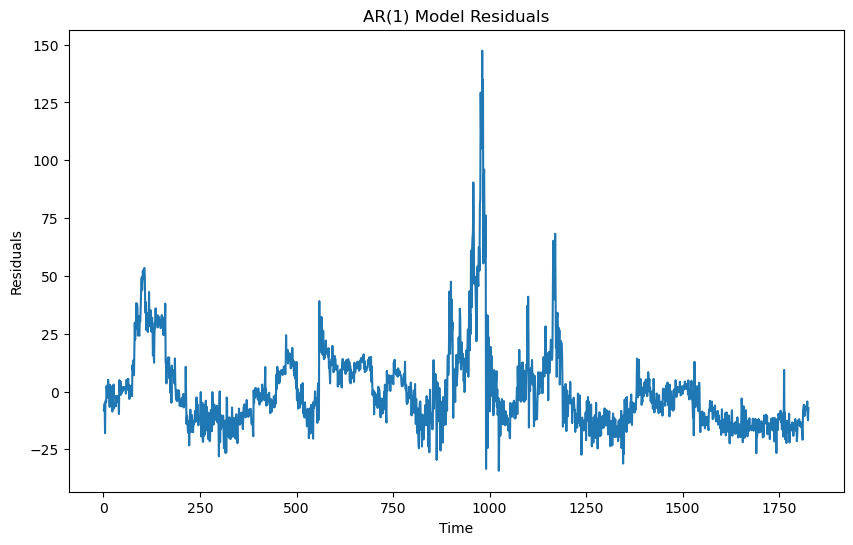

In [7]:
# Apply logarithm to the series
logged_series = np.log(series)

# Create a DataFrame with logged_series and lagged_series
datalog = pd.DataFrame({'Logged_Series': logged_series[1:], 'Lagged_Series': lagged_series})

# Create lagged series for AR(1) model
lagged_series = np.log(series).shift(1).dropna()

# Fit AR(1) model
model = sm.OLS(series[1:], sm.add_constant(lagged_series))
results = model.fit()

# Get residuals
residuals = results.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('AR(1) Model Residuals')
plt.show()

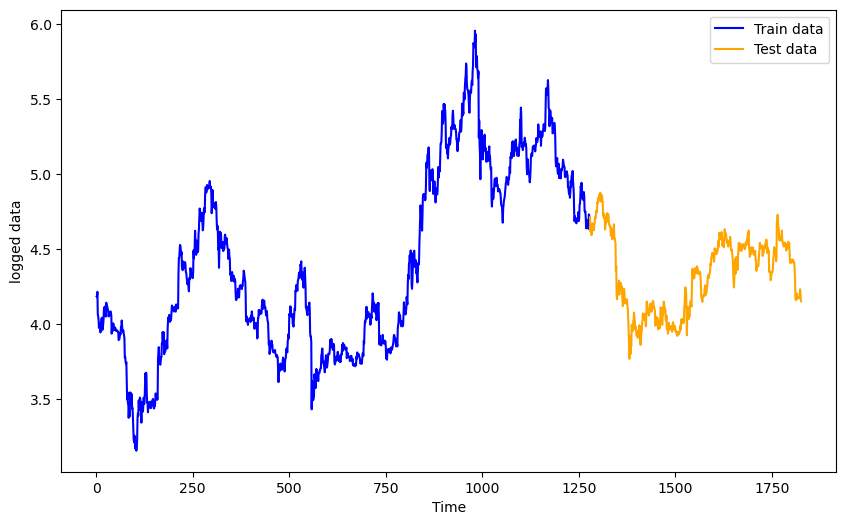

In [8]:

train_size = 0.7
train_data, test_data = train_test_split(datalog.Logged_Series, train_size=train_size, shuffle=False)

# Plot train and test data with different colors
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train data', color='blue')
plt.plot(test_data.index, test_data, label='Test data', color='orange')
plt.xlabel('Time')
plt.ylabel('logged data')
#plt.title('AR(1) Model Residuals')
plt.legend()
plt.show()

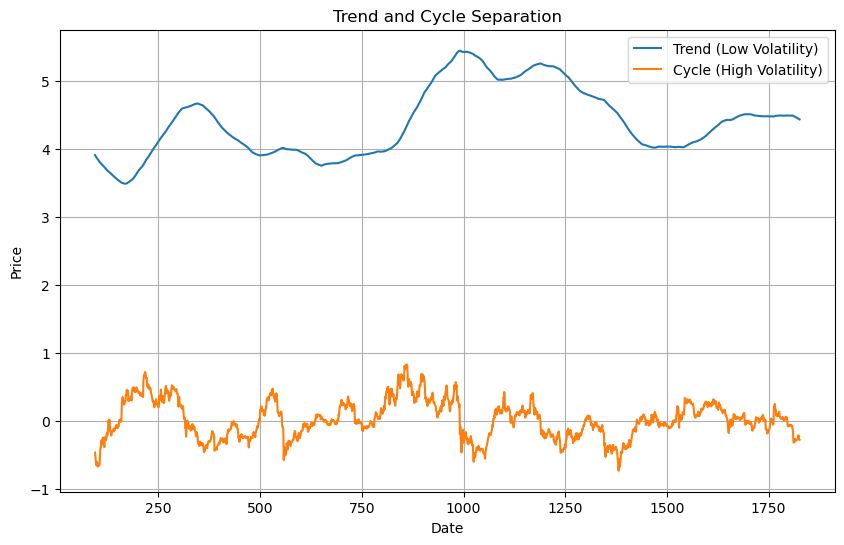

In [63]:
# Load your data and calculate moving averages
# Assuming you have a DataFrame 'datalog' with a 'Date' column and 'ClosingPrice' column
#short_window = 1  # Short-term moving average window
long_window = 94   # Long-term moving average window

#datalog['ShortMA'] = datalog['Logged_Series'].rolling(window=short_window).mean()
datalog['LongMA'] = datalog['Logged_Series'].rolling(window=long_window).mean()

# Calculate differences between short-term and long-term moving averages
#datalog['Difference'] = datalog['ShortMA'] - datalog['LongMA']

# Set a threshold for identifying high volatility periods
threshold = 0.01  # Adjust this value as needed

# Create separate Series for trend and cycle periods
trend_series = datalog['LongMA']
cycle_series = datalog['Logged_Series'] - trend_series

# Identify high and low volatility periods based on the threshold
#high_volatility_series = cycle_series[cycle_series > threshold]
#low_volatility_series = cycle_series[cycle_series <= threshold]
#low_volatility_series = low_volatility_series.reindex(high_volatility_series.index)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the trend (low volatility)
plt.plot(trend_series, label='Trend (Low Volatility)')

# Plot the cycle (high volatility)
plt.plot(cycle_series, label='Cycle (High Volatility)')

# Highlight high and low volatility periods
#plt.scatter(high_volatility_series.index, high_volatility_series,
#            color='red', label='High Volatility Periods')
#plt.scatter(low_volatility_series.index, low_volatility_series,
#            color='green', label='Low Volatility Periods')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Trend and Cycle Separation')
plt.legend()
plt.grid(True)
plt.show()



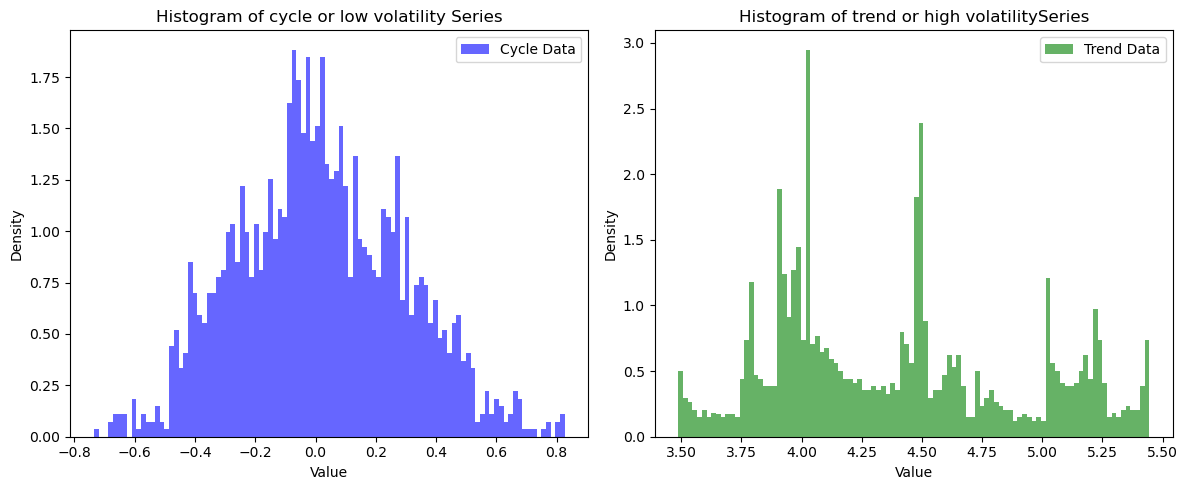

In [65]:
import matplotlib.pyplot as plt

# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram of cycle_series in the first subplot
axs[0].hist(cycle_series, bins=100, density=True, alpha=0.6, color='b', label='Cycle Data')
axs[0].set_title('Histogram of cycle or low volatility Series')

# Plot the histogram of trend_series in the second subplot
axs[1].hist(trend_series, bins=100, density=True, alpha=0.6, color='g', label='Trend Data')
axs[1].set_title('Histogram of trend or high volatilitySeries')

# Add labels and legend
for ax in axs:
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
# Apply Hodrick-Prescott filter
cycle = cycle_series
trend = trend_series

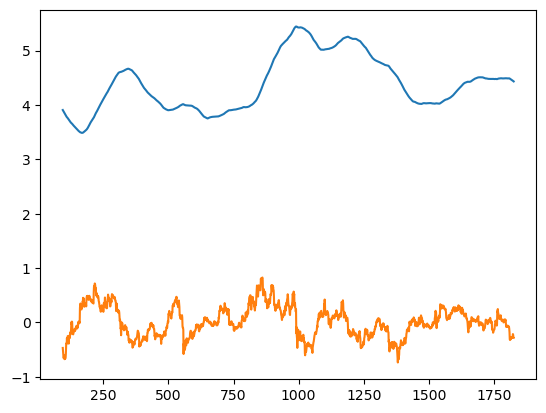

In [11]:
plt.plot(trend, label='Trend')
plt.plot(cycle, label='Cyclical')

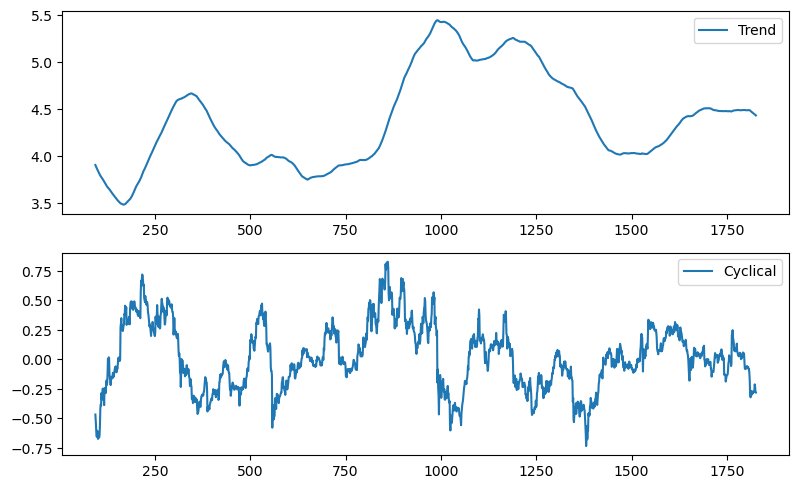

In [12]:
# Reconstruct the original time series using the trend and cyclical components
reconstructed_series = trend + cycle

# Plot the original, reconstructed, trend, and cyclical time series
plt.figure(figsize=(8, 5))
#plt.subplot(411)
#plt.plot(datalog['Logged_Series'], label='Original')
#plt.legend()

#plt.subplot(412)
#plt.plot(reconstructed_series, label='Reconstructed')
#plt.legend()

plt.subplot(211)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(212)
plt.plot(cycle, label='Cyclical')
plt.legend()

plt.tight_layout()
plt.show()

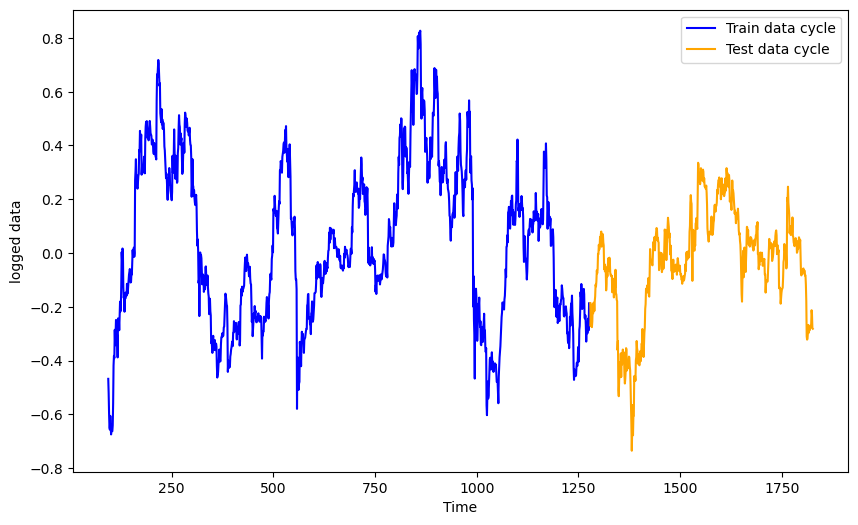

In [13]:

train_size = 0.7
ctrain_data, ctest_data = train_test_split(cycle, train_size=train_size, shuffle=False)

# Plot train and test data with different colors
plt.figure(figsize=(10, 6))
plt.plot(ctrain_data.index, ctrain_data, label='Train data cycle', color='blue')
plt.plot(ctest_data.index, ctest_data, label='Test data cycle', color='orange')
plt.xlabel('Time')
plt.ylabel('logged data')
#plt.title('AR(1) Model Residuals')
plt.legend()
plt.show()

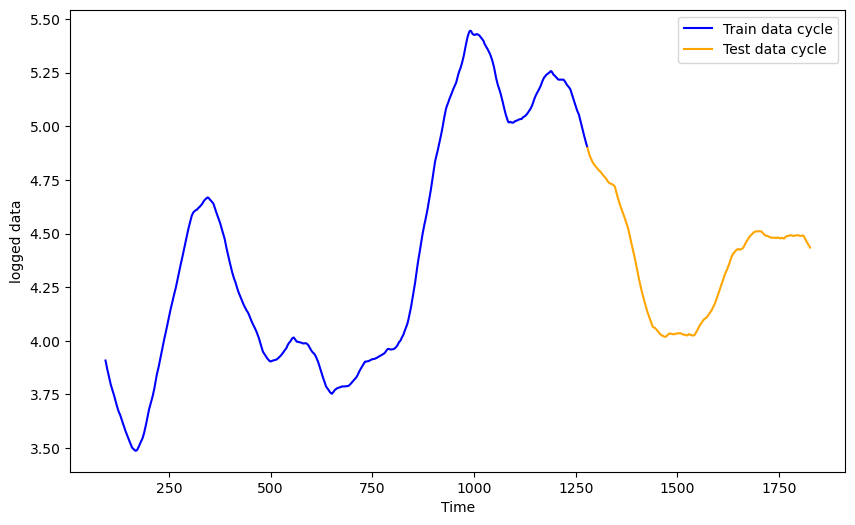

In [14]:

train_size = 0.7
ttrain_data, ttest_data = train_test_split(trend, train_size=train_size, shuffle=False)

# Plot train and test data with different colors
plt.figure(figsize=(10, 6))
plt.plot(ttrain_data.index, ttrain_data, label='Train data cycle', color='blue')
plt.plot(ttest_data.index, ttest_data, label='Test data cycle', color='orange')
plt.xlabel('Time')
plt.ylabel('logged data')
#plt.title('AR(1) Model Residuals')
plt.legend()
plt.show()

In [15]:
traincycle1 = ctrain_data.shift (1)
traincycle2 = ctrain_data.shift (2)
traincycle3 = ctrain_data.shift (3)
traincycle4 = ctrain_data.shift (4)
traincycle5 = ctrain_data.shift (5)

traincycle = pd.concat([ctrain_data, traincycle1, traincycle2, traincycle3, traincycle4, traincycle5], axis=1)

traincycle.columns = ['y', 'df_1', 'df_2', 'df_3', 'df_4', 'df_5']

traincycle = traincycle.dropna()

traincycley = traincycle.y
cols = ['df_1', 'df_2', 'df_3', 'df_4', 'df_5']
traincyclex=traincycle[cols]

In [16]:
scaler_x = preprocessing.MinMaxScaler(feature_range=( -1 , 1))
#import numpy as np
traincyclex = np.array(traincyclex).reshape((len( traincyclex ),5))
traincyclex = scaler_x.fit_transform(traincyclex)

scaler_y = preprocessing.MinMaxScaler(feature_range=( -1 , 1))
#import numpy as np
traincycley = np.array(traincycley).reshape((len( traincycley ),1))
traincycley = scaler_y.fit_transform(traincycley)

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from kerastuner.tuners import RandomSearch

# Define the hyperparameters to search
hyperparameters = {
    'units': [4, 8, 16],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Create a model-building function
def build_model(hp):
    model = tf.keras.models.Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=4, max_value=16, step=4),
                   activation=hp.Choice('activation', values=['relu', 'tanh']),
                   input_shape=(5, 1)))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mean_squared_error',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  metrics=['mse'])
    return model

# Initialize the RandomSearch tuner
tuner = RandomSearch(build_model, objective='val_loss', max_trials=10, directory='tuner_results', project_name='my_tuner')

# Perform the hyperparameter search
tuner.search(traincyclex, traincycley, epochs=10, validation_split=0.2)

# Get the best model's architecture and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Train the best model on the full training data
best_model.fit(traincyclex, traincycley, epochs=10)


INFO:tensorflow:Reloading Tuner from tuner_results\my_tuner\tuner0.json
INFO:tensorflow:Oracle triggered exit


C:\Users\81704\AppData\Local\Temp\ipykernel_15052\1265373867.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


Epoch 1/10
37/37 [==============================] - 3s 7ms/step - loss: 0.0066 - mse: 0.0066
Epoch 2/10
37/37 [==============================] - 0s 8ms/step - loss: 0.0067 - mse: 0.0067
Epoch 3/10
37/37 [==============================] - 0s 6ms/step - loss: 0.0067 - mse: 0.0067
Epoch 4/10
37/37 [==============================] - 0s 6ms/step - loss: 0.0062 - mse: 0.0062
Epoch 5/10
37/37 [==============================] - 0s 6ms/step - loss: 0.0061 - mse: 0.0061
Epoch 6/10
37/37 [==============================] - 0s 6ms/step - loss: 0.0062 - mse: 0.0062
Epoch 7/10
37/37 [==============================] - 0s 11ms/step - loss: 0.0059 - mse: 0.0059
Epoch 8/10
37/37 [==============================] - 0s 6ms/step - loss: 0.0060 - mse: 0.0060
Epoch 9/10
37/37 [==============================] - 0s 7ms/step - loss: 0.0060 - mse: 0.0060
Epoch 10/10
37/37 [==============================] - 0s 6ms/step - loss: 0.0060 - mse: 0.0060


In [18]:
# Print the optimal hyperparameters
print("Optimal Hyperparameters:")
print(best_hyperparameters)

# Print the architecture of the best model
print("Best Model Architecture:")
print(best_model.summary())

# Print the weights of the best model's layers
print("Weights of the Best Model:")
for layer in best_model.layers:
    print("Layer Name:", layer.name)
    print("Weights:", layer.get_weights())
    print("---------------------")


Optimal Hyperparameters:
Best Model Architecture:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1152      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1169 (4.57 KB)
Trainable params: 1169 (4.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Weights of the Best Model:
Layer Name: lstm
Weights: [array([[ 2.28462279e-01, -1.71765581e-01,  3.36957946e-02,
        -8.50654915e-02, -3.61507833e-02, -1.35618262e-02,
         2.46442571e-01,  2.03162469e-02, -7.27435887e-01,
        -2.33987138e-01, -5.19879013e-02,  1.14746906e-01,
         8.01512450e-02, -1.67023242e-01, -2.61365175e-01,
        -1.92659

In [19]:
testcycle1 = ctest_data.shift (1)
testcycle2 = ctest_data.shift (2)
testcycle3 = ctest_data.shift (3)
testcycle4 = ctest_data.shift (4)
testcycle5 = ctest_data.shift (5)

In [20]:
testcycle1 = ctest_data.shift (1)
testcycle2 = ctest_data.shift (2)
testcycle3 = ctest_data.shift (3)
testcycle4 = ctest_data.shift (4)
testcycle5 = ctest_data.shift (5)

testcycle = pd.concat([test_data, ctest_data, testcycle1, testcycle2, testcycle3, testcycle4, testcycle5], axis=1)

testcycle.columns = ['yy', 'y', 'df_1', 'df_2', 'df_3', 'df_4', 'df_5']

testcycle = testcycle.dropna()

testcycley = testcycle.y
testcycley2 = testcycle.yy
cols = ['df_1', 'df_2', 'df_3', 'df_4', 'df_5']
testcyclex=testcycle[cols]

In [21]:
scaler_x = preprocessing.MinMaxScaler(feature_range=( -1 , 1))
#import numpy as np
testx = np.array(testcyclex).reshape((len( testcyclex ),5))
testx = scaler_x.fit_transform(testcyclex)

scaler_y = preprocessing.MinMaxScaler(feature_range=( -1 , 1))
#import numpy as np
testcycley = np.array(testcycley).reshape((len( testcycley ),1))
testcycley = scaler_y.fit_transform(testcycley)

In [22]:
score_train = best_model.evaluate(traincyclex, traincyclex , batch_size =1)
score_test = best_model.evaluate(testcyclex, testcycley, batch_size =1)


print(" in train MSE = " , round( score_train[0], 4))
print(" in test MSE = " , round( score_test[0] ,4))


543/543 [==============================] - 2s 3ms/step - loss: 0.1522 - mse: 0.1522
 in train MSE =  0.0094
 in test MSE =  0.1522


In [23]:
predcycle = best_model.predict(testcyclex)
predcycle = scaler_y.inverse_transform(np.array(predcycle).reshape((len( predcycle ),1)))

17/17 [==============================] - 0s 4ms/step


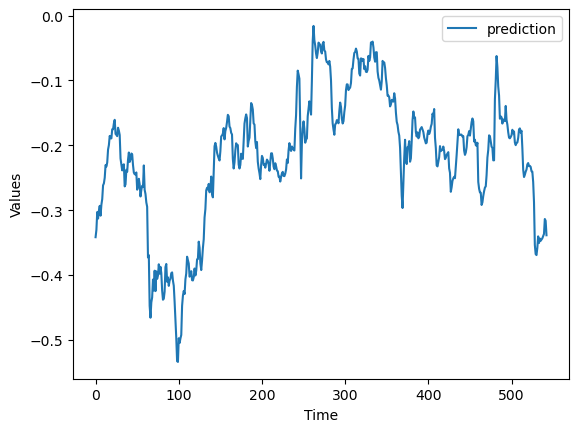

In [24]:
# Assuming ytest and pred1 are Pandas Series or NumPy arrays
# You can convert them to arrays using: ytest.values and pred1.values
#plt.plot(testcycley2.values, label='(raw data)')
plt.plot(predcycle, label='prediction')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [25]:
traintrend1 = ttrain_data.shift (1)
traintrend2 = ttrain_data.shift (2)
traintrend3 = ttrain_data.shift (3)
traintrend4 = ttrain_data.shift (4)
traintrend5 = ttrain_data.shift (5)

traintrend = pd.concat([ttrain_data, traintrend1, traintrend2, traintrend3, traintrend4, traintrend5], axis=1)

traintrend.columns = ['y', 'df_1', 'df_2', 'df_3', 'df_4', 'df_5']

traintrend = traintrend.dropna()

traintrendy = traintrend.y
cols = ['df_1', 'df_2', 'df_3', 'df_4', 'df_5']
traintrendx=traintrend[cols]

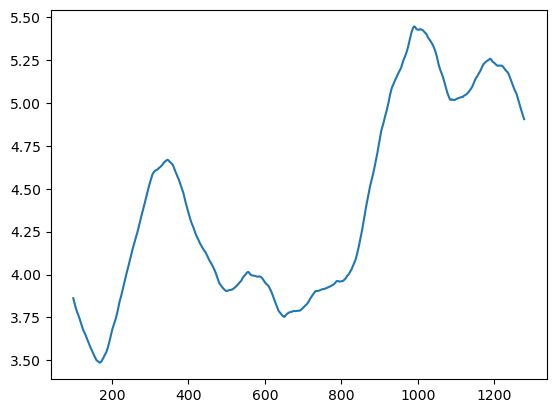

In [26]:
plt.plot(traintrendy)

In [27]:
# Shifting and creating lagged features for the trend component in test_data
testtrend1 = ttest_data.shift(1)
testtrend2 = ttest_data.shift(2)
testtrend3 = ttest_data.shift(3)
testtrend4 = ttest_data.shift(4)
testtrend5 = ttest_data.shift(5)

# Concatenating the lagged features into a DataFrame for test_data
testtrend = pd.concat([ttest_data, testtrend1, testtrend2, testtrend3, testtrend4, testtrend5], axis=1)

# Renaming columns in the testtrend DataFrame
testtrend.columns = ['y', 'df_1', 'df_2', 'df_3', 'df_4', 'df_5']

# Dropping rows with missing values (NaN)
testtrend = testtrend.dropna()

# Separating the target variable (y) and feature columns for test_data
testtrendy = testtrend.y
cols = ['df_1', 'df_2', 'df_3', 'df_4', 'df_5']
testtrendx = testtrend[cols]

In [28]:
# Initialize model
model = auto_arima(traintrendy, max_p=3, max_q=3, seasonal=False, trace=True,
                       error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-13439.522, Time=1.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-13443.686, Time=0.66 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-13442.609, Time=1.24 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-13442.579, Time=0.74 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-13445.688, Time=0.32 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-13439.686, Time=1.07 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 5.245 seconds


In [29]:
# Determine model parameters
model.fit(traintrendy)
order = model.get_params()['order']
print('ARIMA order:', order, '\n')

ARIMA order: (0, 2, 0) 



In [30]:
testtrendy_list = testtrendy.tolist()
traintrendy_list = traintrendy.tolist()

In [31]:
# Genereate predictions
prediction = []
for i in range(len(testtrendy_list)):
    model = pm.ARIMA(order=order)
    model.fit(traintrendy_list)
    test_len = len(testtrendy_list)
    #print('working on', i+1, 'of', test_len, '-- ' + str(int(100 * (i + 1) / test_len)) + '% complete')
    prediction.append(model.predict()[0])
    traintrendy_list.append(testtrendy_list[i])

    # Generate error data
# Generate error data
mse = mean_squared_error(testtrendy_list, prediction)
rmse = mse ** 0.5

C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\81704\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

In [32]:
def mean_absolute_percentage_error(actual, prediction):
    global actual2, prediction2 #, test, model, order, scaler, x_train, y_train, x_test, i, lstm_len
    actual = pd.Series(actual)
    prediction = pd.Series(prediction)
    prediction2 = prediction.copy()
    actual2 = actual.copy()
    return 100 * np.mean(np.abs((actual - prediction))/actual)

mape = mean_absolute_percentage_error(pd.Series(testtrendy_list), pd.Series(prediction))

In [33]:
print(mse)
print(rmse)
print(mape)

5.1091727371315135e-06
0.002260347923911607
0.013656537597344755


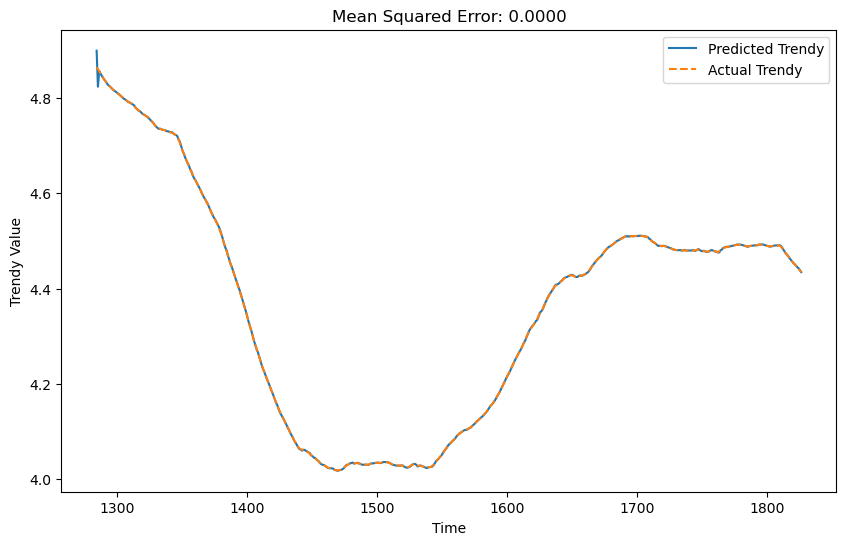

Mean Squared Error: 0.0000


In [34]:
plt.figure(figsize=(10, 6))
plt.plot(testtrendy.index, prediction, label='Predicted Trendy')
plt.plot(testtrendy.index, testtrendy_list, label='Actual Trendy', linestyle='--')


plt.xlabel('Time')
plt.ylabel('Trendy Value')
plt.legend()
plt.title(f'Mean Squared Error: {mse:.4f}')
plt.show()

print(f"Mean Squared Error: {mse:.4f}")

## Using linear regression instead of Arima

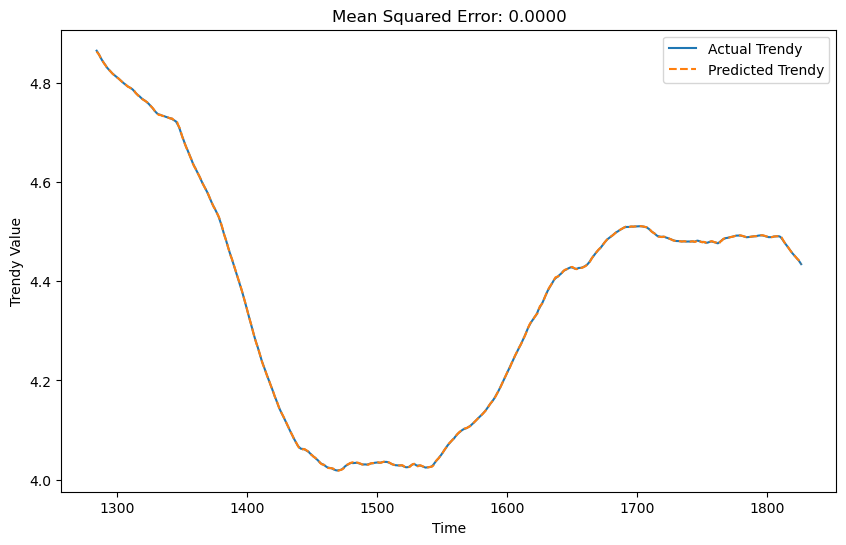

Mean Squared Error: 0.0000


In [66]:
# Assuming traintrendy and testtrendx are already defined
# Train linear regression model
regressor = LinearRegression()
regressor.fit(traintrendx, traintrendy)

# Predict output using testtrendx
predicted_output = regressor.predict(testtrendx)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(testtrendy, predicted_output)

# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(testtrendy.index, testtrendy, label='Actual Trendy')
plt.plot(testtrendy.index, predicted_output, label='Predicted Trendy',linestyle='--')
plt.xlabel('Time')
plt.ylabel('Trendy Value')
plt.legend()
plt.title(f'Mean Squared Error: {mse:.4f}')
plt.show()

print(f"Mean Squared Error: {mse:.4f}")

In [71]:
testcycley2

1284    4.611328
1285    4.672288
1286    4.631379
1287    4.653630
1288    4.661857
          ...   
1822    4.182699
1823    4.232547
1824    4.214488
1825    4.158123
1826    4.152415
Name: yy, Length: 543, dtype: float64

In [72]:
#predicted_output.to_csv('predicted_output.csv')
# Create a Pandas DataFrame from the NumPy array
ddd = pd.DataFrame(testcycley2.values, columns=['testcycley2'])  # Replace 'Column_Name' with your desired column name

# Define the file path where you want to save the CSV file
file_path = 'testcycley2.csv'

# Save the DataFrame to a CSV file
ddd.to_csv(file_path)

In [69]:
#predicted_output.to_csv('predicted_output.csv')
# Create a Pandas DataFrame from the NumPy array
ddd = pd.DataFrame(predicted_output, columns=['predicted_output'])  # Replace 'Column_Name' with your desired column name

# Define the file path where you want to save the CSV file
file_path = 'predicted_output.csv'

# Save the DataFrame to a CSV file
ddd.to_csv(file_path)

In [36]:
# Create two example arrays
array1 = np.array(predicted_output)
array2 = np.array(predcycle)

In [37]:
#(array2) 
array2_list = np.array(array2).flatten()

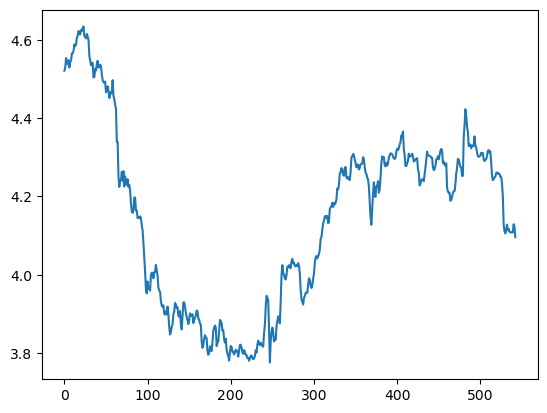

In [38]:
# Add arrays component by component
sum_array = array1 + array2_list

plt.plot(sum_array)

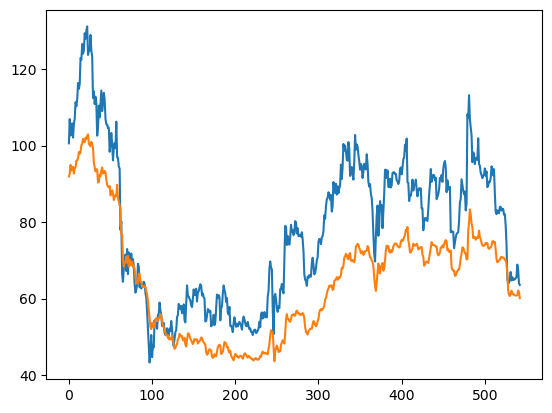

In [39]:
plt.plot(np.exp(testcycley2.values))
plt.plot(np.exp(sum_array))

In [46]:
#import numpy as np

# Assuming ytest.values and pred1 are NumPy arrays of the same length
ytest_values = np.exp(testcycley2.values)
pred1_values = np.exp(sum_array)

# Initialize variables for positions and capital
capital = 1  # Initial capital in USD
position = 0     # 0: no position, 1: long (buy), -1: short (sell)
initcapital = 1
# Initialize lists to track transactions and capital over time
transactions = []
capital_over_time = [capital]
pricedifference = []
# Backtest strategy
for i in range(len(ytest_values) - 1):
    if pred1_values[i + 1] > ytest_values[i]:
        # Buy if prediction for next time step is greater than actual and no existing long position
        position = 1
        buy_price = ytest_values[i]
        capital = capital * (1 + (ytest_values[i + 1] - buy_price) / buy_price)
        capital_over_time.append(capital)
        kk = pred1_values[i + 1] - ytest_values[i]
        pricedifference.append(kk)
        transactions.append(('Buy', pred1_values[i + 1], ytest_values[i], ytest_values[i+1], ytest_values[i+1]-ytest_values[i], capital_over_time[-1]))
    elif pred1_values[i + 1] < ytest_values[i]:
        # Sell if prediction for next time step is less than actual and no existing short position
        position = -1
        sell_price = ytest_values[i]
        capital = capital * (1 - (ytest_values[i + 1] - sell_price) / sell_price)
        capital_over_time.append(capital)
        kk = pred1_values[i + 1] - ytest_values[i]
        pricedifference.append(kk)
        transactions.append(('Sell', pred1_values[i + 1], ytest_values[i], ytest_values[i+1], ytest_values[i+1]-ytest_values[i], capital_over_time[-1]))
    else:
        # Hold (do nothing)
        transactions.append(('Hold', None))
        pricedifference.append(('Hold', None))

    # Calculate capital after each transaction
    #if position == 1:
    #    capital = capital * (1 + (ytest_values[i + 1] - buy_price) / buy_price)
    #elif position == -1:
    #    capital = capital * (1 - (ytest_values[i + 1] - sell_price) / sell_price)

    

# Calculate final profit or return
profit = capital - initcapital  # Profit is the final capital minus the initial capital

print(f"Final capital: ${capital:.2f}")
print(f"Profit: ${profit:.2f}")

Final capital: $1.19
Profit: $0.19


In [47]:
import numpy as np

# Assuming ytest.values and pred1 are NumPy arrays of the same length
ytest_values = np.exp(testcycley2.values)
pred1_values = np.exp(sum_array)

# Initialize variables for positions and capital
capital = 1  # Initial capital in USD
position = 0     # 0: no position, 1: long (buy), -1: short (sell)
initcapital = 1
# Initialize lists to track transactions and capital over time
transactions = []
capital_over_time = [capital]
pricedifference = []
returns = []  # List to track returns at each iteration
# Backtest strategy
for i in range(len(ytest_values) - 1):
    if pred1_values[i + 1] > ytest_values[i]:
        # Buy if prediction for next time step is greater than actual and no existing long position
        position = 1
        buy_price = ytest_values[i]
        return_at_iteration = (ytest_values[i + 1] - buy_price) / buy_price  # Calculate return at this iteration
        capital = capital * (1 + (ytest_values[i + 1] - buy_price) / buy_price)
        #capital = capital * (1 + return_at_iteration)
        capital_over_time.append(capital)
        kk = pred1_values[i + 1] - ytest_values[i]
        pricedifference.append(kk)        
        transactions.append(('Buy', pred1_values[i + 1], ytest_values[i], ytest_values[i+1], return_at_iteration, capital_over_time[-1]))
    elif pred1_values[i + 1] < ytest_values[i]:
        # Sell if prediction for next time step is less than actual and no existing short position
        position = -1
        sell_price = ytest_values[i]
        return_at_iteration = -1*(ytest_values[i + 1] - sell_price) / sell_price  # Calculate return at this iteration
        capital = capital * (1 - (ytest_values[i + 1] - sell_price) / sell_price)
        #capital = capital * (1 + return_at_iteration)
        capital_over_time.append(capital)
        kk = pred1_values[i + 1] - ytest_values[i]
        pricedifference.append(kk)
        transactions.append(('Sell', pred1_values[i + 1], ytest_values[i], ytest_values[i+1], return_at_iteration, capital_over_time[-1]))
    else:
        # Hold (do nothing)
        transactions.append(('Hold', None))
        pricedifference.append(('Hold', None))
    
    # Append return at this iteration to the returns list
    returns.append(return_at_iteration)  # Multiply by 100 to get percentage return

# Calculate final profit or return
profit = capital - initcapital  # Profit is the final capital minus the initial capital

print(f"Final capital: ${capital:.2f}")
print(f"Profit: ${profit:.2f}")


Final capital: $1.19
Profit: $0.19


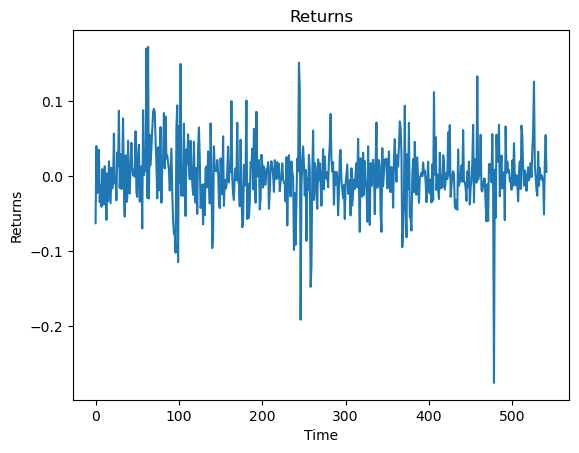

In [59]:
plt.plot(returns)
plt.xlabel('Time')
plt.ylabel('Returns')
#plt.legend()
plt.title('Returns')
plt.show()

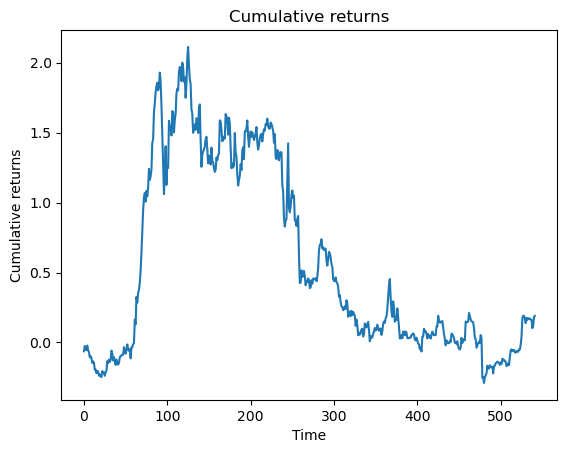

In [58]:
cumulative_return = np.cumprod(1 + np.array(returns)) - 1
plt.plot(cumulative_return)
plt.xlabel('Time')
plt.ylabel('Cumulative returns')
#plt.legend()
plt.title('Cumulative returns')
plt.show()

In [50]:
import pandas as pd
import numpy as np


# Convert the NumPy array into a DataFrame
df = pd.DataFrame({'Stock_Price': ytest_values})
df['predicted_price'] = pred1_values

# Compute the previous price and add it to the DataFrame
df['Previous_Price'] = df['Stock_Price'].shift(1)

# Print the DataFrame
print(df)

     Stock_Price  predicted_price  Previous_Price
0     100.617645        91.947968             NaN
1     106.942093        92.669214      100.617645
2     102.655510        94.972143      106.942093
3     104.965355        93.489817      102.655510
4     105.832397        94.220076      104.965355
..           ...              ...             ...
538    65.542503        60.843499       65.367111
539    68.892471        60.853592       65.542503
540    67.659531        62.126862       68.892471
541    63.951378        61.725661       67.659531
542    63.587391        60.105687       63.951378

[543 rows x 3 columns]


In [51]:
df.head()

,Stock_Price,predicted_price,Previous_Price
0,100.617645,91.947968,NaN
1,106.942093,92.669214,100.617645
2,102.655510,94.972143,106.942093
3,104.965355,93.489817,102.655510
4,105.832397,94.220076,104.965355


In [52]:
# Calculate deltaYF
# deltaYF = yF - np.roll(y, 1)
deltaYF = df.predicted_price - df.Previous_Price

deltaYF[0] = 0  # Set the first element to 0 since there's no y at t-1 for the first element

# Trading strategy
pos = np.zeros_like(df.Previous_Price)
pos[deltaYF > 0] = 1
pos[deltaYF < 0] = -1

import numpy as np

def backshift(day, x):
    assert day >= 0
    y = np.concatenate((np.full(day, np.nan), x[:-day]))
    return y

# Apply backshift with day=1
result = backshift(1, pos)

#print("Original 'pos' array:")
#print(pos)

#print("\nResult after backshift(1, pos):")
#print(result)

y = df.Previous_Price

# Calculate returns 
ret = backshift(1, pos) * (y - backshift(1, y)) /backshift(1, y)
ret[0] = 0  # Replace the NaN at the first position with 0

# Assuming 'ret' is a NumPy array in Python
ret[np.isnan(ret)] = 0
cumret = np.cumprod(1 + ret) - 1

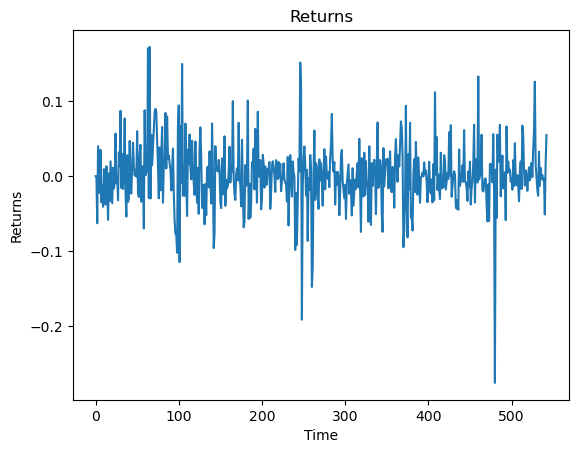

In [60]:
plt.plot(ret)
plt.xlabel('Time')
plt.ylabel('Returns')
#plt.legend()
plt.title('Returns')
plt.show()

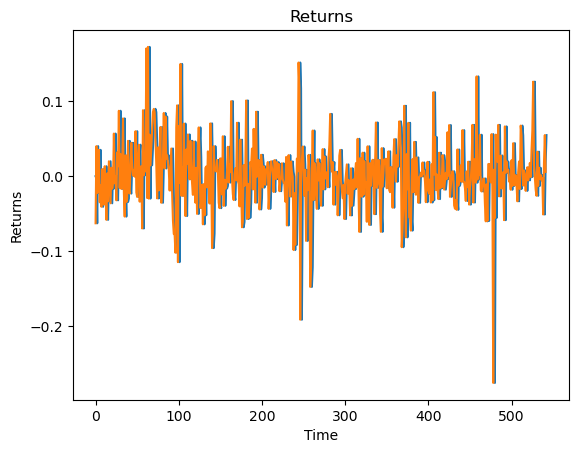

In [61]:
plt.plot(ret)
plt.plot(returns)
plt.xlabel('Time')
plt.ylabel('Returns')
#plt.legend()
plt.title('Returns')
plt.show()

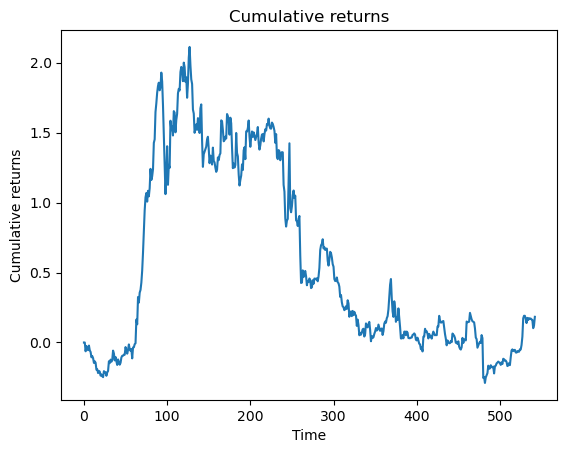

In [57]:
plt.plot(cumret)
plt.xlabel('Time')
plt.ylabel('Cumulative returns')
#plt.legend()
plt.title('Cumulative returns')
plt.show()